# Evalution d'une situation au cours du temps.


Un fumeur décide d’arrêter de fumer. On choisit d’utiliser la modélisation suivante :
  * s’il ne fume pas un jour donné, il ne fume pas le jour suivant avec une probabilité de 0,9.
  * s’il fume un jour donné, il fume le jour suivant avec une probabilité de 0,6.
  
On appelle $p_n$ la probabilité de ne pas fumer le $n^{ième}$ jour après sa décision d’arrêter de fumer et $q_n$, la probabilité de fumer le $n^{ième}$ jour après sa décision d’arrêter de fumer.

On suppose que $p_0 = 0$ et $q_0 = 1$ et $\left \{
\begin{array}{rcl}
p_{n+1}&=&0,9p_n+0,4q_n \\
q_{n+1}&=&0,1p_n+0,6q_n
\end{array}
\right.$

## Modélisation

In [1]:
def fume(n):
    """Renvoie la probabilité que le fumeur fume le jour n"""
    p = 0
    q = 1
    for i in range(n + 1):
        p, q = 0.9 * p + 0.4 * q, 0.1 * p + 0.6 * q
    return q

In [2]:
fume(154)

0.20000000000000046

In [3]:
def ne_fume_plus(n):
    """Renvoie la probabilité que le fumeur ne fume plus le jour n"""
    return 1 - fume(n)

In [5]:
ne_fume_plus(30)

0.7999999996274707

## Etude de la suite $(p_n)$

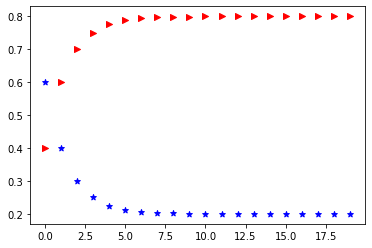

In [6]:
import matplotlib.pyplot as plt

x = [n for n in range(20)]
y = [ne_fume_plus(n) for n in range(20)]
z = [fume(n) for n in range(20)]
plt.scatter(x, y, c = 'r', marker = '>')
plt.scatter(x, z, c = 'b', marker = '*')
plt.show()

* $(p_n)$ semble croissante.

* $p_n+q_n=1$. On en déduit que $p_{n+1}=0,9p_n+0.4(1-p_n)=-0,5p_n+0,4$

* On pose $u_n=p_n-\dfrac{4}{5}$.

$u_{n+1}=p_{n+1}-\dfrac{4}{5} = \dfrac{1}{2}p_n+\dfrac{4}{10}-\dfrac{4}{5} = \dfrac{1}{2}p_n-\dfrac{4}{10}=\dfrac{1}{2}\left(p_n-\dfrac{4}{5}\right) = \dfrac{1}{2}u_n$

$(u_n)$ est une suite géométrique de raison $\dfrac{1}{2}$ avec $u_0=p_0-\dfrac{4}{5}=-\dfrac{4}{5}$

* $p_n=u_n+\dfrac{4}{5}=-\dfrac{4}{5}\left(\dfrac{1}{2}\right)^n+\dfrac{4}{5} = \dfrac{4}{5}\left(1-\left(\dfrac{1}{2}\right)^n\right)$

In [7]:
for i in (10, 100, 1000, 10000, 100000, 1000000, 10000000):
    print(ne_fume_plus(i))

0.799609375
0.7999999999999996
0.7999999999999996
0.7999999999999996
0.7999999999999996
0.7999999999999996
0.7999999999999996


On conjecture que $\lim\limits_{n \rightarrow +\infty} p = 0,8$

In [10]:
def certitude():
    n = 0
    while abs(0.8 - ne_fume_plus(n)) >= 0.01:
        n = n + 1
    return n

In [11]:
certitude()

6

On trouve $n=6$. A partir du $6^e$ jour, on considère que le fumeur a 80% de chances d'arrêter de fumer.